In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
import visual_genome.local as vg

VG_DATA_PATH = './data/visual-genome'

# load vg image info and region description
all_image_data = vg.get_all_image_data(data_dir=VG_DATA_PATH)
all_region_descriptions = vg.get_all_region_descriptions(data_dir=VG_DATA_PATH)

In [27]:
print('vg data size {}'.format(len(all_image_data)))
print('-----------------')
print('[all_image_data] type {}'.format(type(all_image_data[0])))
print('example')
print(all_image_data[0])
print('-----------------')
print('[all_region_descriptions] list of type {}'.format(type(all_region_descriptions[0][0])))
print('example')
print(all_region_descriptions[0])

vg data size 108077
-----------------
[all_image_data] type <class 'visual_genome.models.Image'>
example
id: 1, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg
-----------------
[all_region_descriptions] list of type <class 'visual_genome.models.Region'>
example
[id: 1382, x: 421, y: 57, width: 82,height: 139, phrase: the clock is green in colour, image: 1, id: 1383, x: 194, y: 372, width: 182,height: 109, phrase: shade is along the street , image: 1, id: 1384, x: 241, y: 491, width: 61,height: 30, phrase: man is wearing sneakers, image: 1, id: 1385, x: 617, y: 377, width: 36,height: 36, phrase: cars headlights are off, image: 1, id: 1386, x: 322, y: 298, width: 41,height: 49, phrase: bikes are parked at the far edge, image: 1, id: 1432, x: 122, y: 14, width: 84,height: 178, phrase: A sign on the facade of the building, image: 1, id: 1433, x: 624, y: 236, width: 96,height: 332, phrase: A tree trunk on the sidewalk, image: 1, id: 1434, 

### Visualizing regions

In [23]:
import os
import re

def vg_url_to_file_path(vg_data_path, url):
    
    res = re.search('(VG.*)/(.*.jpg)$', url)
    return os.path.join(vg_data_path, res.group(1), res.group(2))

In [24]:
vg_url_to_file_path(VG_DATA_PATH, all_image_data[2].url)

'./data/VG_100K/3.jpg'

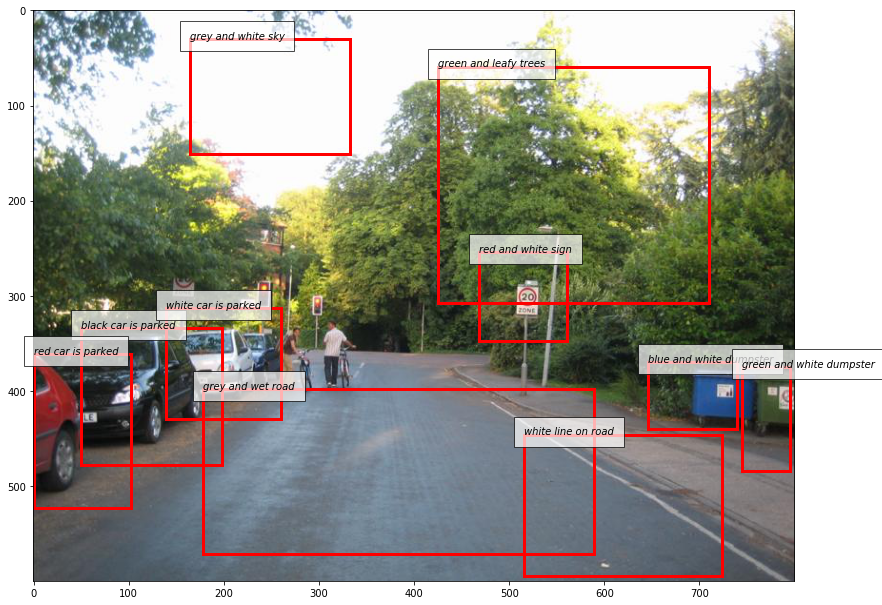

In [34]:
# Ref: https://github.com/ranjaykrishna/visual_genome_python_driver/blob/master/region_visualization_demo.ipynb

import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
def visualize_regions(image_file_path, regions):
    img = Image.open(image_file_path)
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

IMG_IDX = 200

image_file_path = vg_url_to_file_path(VG_DATA_PATH, all_image_data[IMG_IDX].url)
regions = all_region_descriptions[IMG_IDX]

visualize_regions(image_file_path, regions[:10])